In [1]:
import pandas as pd
import numpy as np

In [3]:
# This creates a pandas dataframe and assigns it to the titanic variable.
dfTitanic = pd.read_csv("C:\\Users\\Sony\\Desktop\\train.csv")
# Print the first 5 rows of the dataframe.
dfTitanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# This creates a pandas dataframe and assigns it to the titanic variable.
dfTitanic_test = pd.read_csv("C:\\Users\\Sony\\Desktop\\test.csv")
# Print the first 5 rows of the dataframe.
dfTitanic_test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [7]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
dfTitanic.shape

(891, 12)

In [8]:
#Describe gives statistical information about numerical columns in the dataset
dfTitanic.describe()
#you can check from count if there are missing vales in columns, here age has got missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#To see if there are any more columns with missing values 
null_columns=dfTitanic.columns[dfTitanic.isnull().any()]
dfTitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
dfTitanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
#Age, Fare and cabin has missing values. we will see how to fill missing values next.

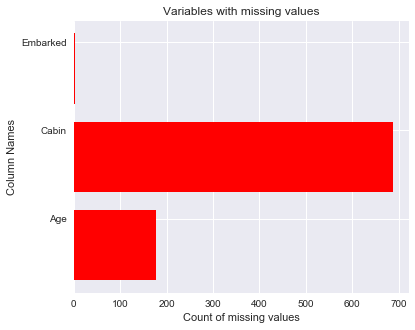

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)


labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(dfTitanic[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

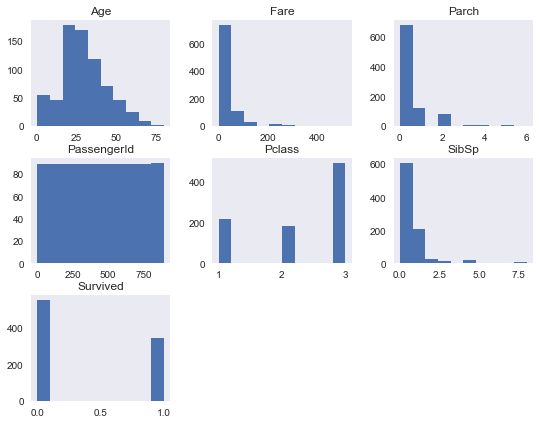

In [18]:
dfTitanic.hist(bins=10,figsize=(9,7),grid=False);

In [19]:
#we can see that Age and Fare are measured on very different scaling. So we need to do feature scaling before predictions.

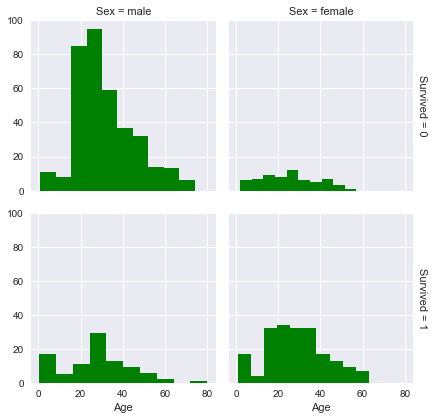

In [21]:
g = sns.FacetGrid(dfTitanic, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="green");

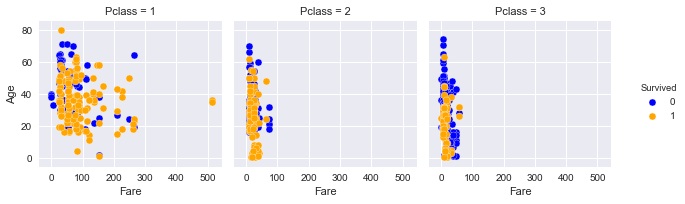

In [23]:
g = sns.FacetGrid(dfTitanic, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"orange", 0:"blue"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

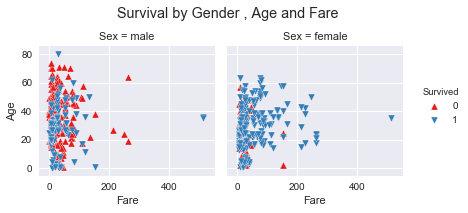

In [24]:
g = sns.FacetGrid(dfTitanic, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

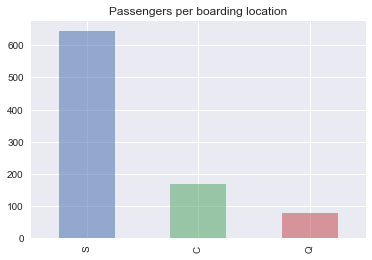

In [25]:
dfTitanic.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

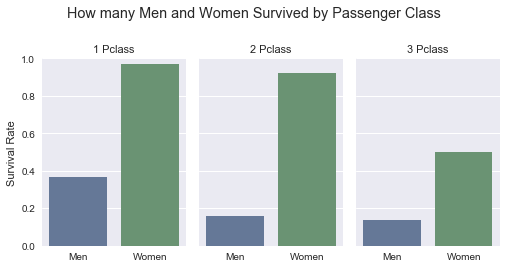

In [26]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=dfTitanic, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

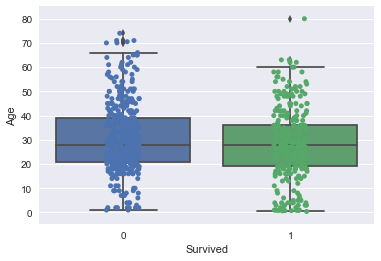

In [33]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=dfTitanic)
ax = sns.stripplot(x="Survived", y="Age",
                   data=dfTitanic, jitter=True,
                   edgecolor="gray")


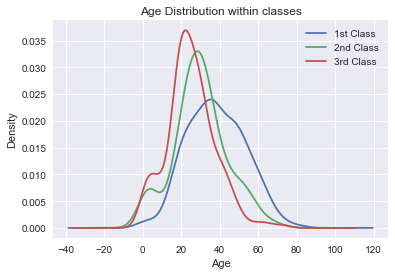

In [34]:
dfTitanic.Age[dfTitanic.Pclass == 1].plot(kind='kde')    
dfTitanic.Age[dfTitanic.Pclass == 2].plot(kind='kde')
dfTitanic.Age[dfTitanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

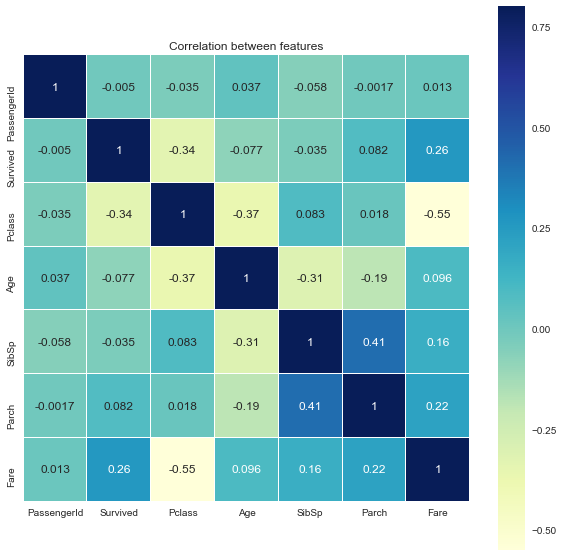

In [35]:
corr=dfTitanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [37]:
dfTitanic["Deck"]=dfTitanic.Cabin.str[0]
dfTitanic_test["Deck"]=dfTitanic.Cabin.str[0]
dfTitanic["Deck"].unique() # 0 is for null values

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

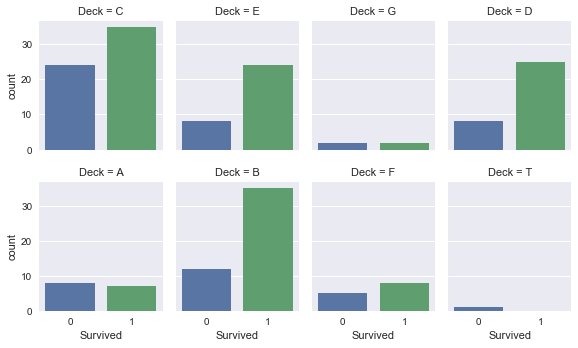

In [38]:
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=dfTitanic[dfTitanic.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8);